In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#define filepath and import the data
fp = r'C:/Users/Leena/python/notebooks-master/final/2315676.txt'
data = pd.read_csv(
    fp,
    skiprows=[1],
    na_values=["-9999"],
    delim_whitespace = True,
)

In [31]:
#create column for temperature estimate (average)
data["TAVG_EST"] = data["TAVG"]
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_EST
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,NaN
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,NaN
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,NaN
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,NaN
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,NaN
...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,47.0
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,43.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,42.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,45.0


In [32]:
#find missing values
missing_tavg = data["TAVG"].isna()
missing_tavg
data.loc[missing_tavg, "TAVG_EST"] = (data.loc[missing_tavg, "TMAX"] + data.loc[missing_tavg, "TMIN"])
data
#drop rows where tavg_est still NaN
data.dropna(subset=["TAVG_EST"], inplace = True)
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_EST
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-35.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-20.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-20.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-30.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-32.0
...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,47.0
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,43.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,42.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,45.0


In [33]:
#convert from fahrenheit to celsius and apply it to tavg_est column
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9
data["TAVG_EST"] = pd.to_numeric(data["TAVG_EST"], errors = "coerce")
data["TAVG_C"] = data["TAVG_EST"].apply(fahrenheit_to_celsius)
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_EST,TAVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-35.0,-37.222222
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-20.0,-28.888889
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-20.0,-28.888889
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-30.0,-34.444444
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-32.0,-35.555556
...,...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,47.0,8.333333
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,43.0,6.111111
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,42.0,5.555556
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,45.0,7.222222


In [77]:
#create year, month and day columns
data["YEAR"] = data["DATE"].astype(str).str.slice(start=0, stop=4)
data
#data["MONTH"] = data["DATE"].astype(str).str.slice(start=4, stop=6)
data["DATE"] = pd.to_datetime(data["DATE"], format = "%Y%m%d")
data["MONTH"] = data["DATE"].dt.month
data["DAY"] = data["DATE"].dt.day
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_EST,TAVG_C,YEAR,MONTH,DAY,SEASON
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,NaN,2.0,-37.0,-35.0,-37.222222,1908,1,1,Autumn
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,NaN,6.0,-26.0,-20.0,-28.888889,1908,1,2,Autumn
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,NaN,7.0,-27.0,-20.0,-28.888889,1908,1,3,Autumn
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,NaN,-3.0,-27.0,-30.0,-34.444444,1908,1,4,Autumn
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,NaN,4.0,-36.0,-32.0,-35.555556,1908,1,5,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-03,47.0,51.0,NaN,47.0,8.333333,2020,10,3,Autumn
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-04,43.0,47.0,37.0,43.0,6.111111,2020,10,4,Autumn
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-05,42.0,NaN,37.0,42.0,5.555556,2020,10,5,Autumn
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,2020-10-06,45.0,46.0,43.0,45.0,7.222222,2020,10,6,Autumn


In [79]:
#create seasons for certain months
def get_season(MONTH):
    if MONTH in [12, 1, 2]:
        return "Winter"
    elif MONTH in [3, 4, 5]:
        return "Spring"
    elif MONTH in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

    #add season column  
data["SEASON"] = data["MONTH"].apply(get_season)
data
data["SEASON"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [81]:
#calculate seasonal average temperatures
seasons = ["Winter", "Spring", "Summer", "Autumn"]
seasonal_avg_temps = seasonal_avg_temps.reindex(columns=seasons)

seasonal_avg_temps = data.groupby(["YEAR", "SEASON"])["TAVG_C"].mean().unstack()
seasonal_avg_temps

SEASON,Autumn,Spring,Summer,Winter
YEAR,,,,
1908,14.059343,1.308429e+01,40.629630,-6.883780
1909,17.466125,6.802469e+00,41.407005,-5.384088
1910,14.293651,1.753268e+01,38.031401,-1.165756
1911,15.219479,1.353308e+01,40.360195,-5.661041
1912,13.630952,9.716184e+00,39.969475,-19.712418
...,...,...,...,...
2016,1.355311,2.028986e+00,13.653382,-11.190476
2017,0.695971,-1.817633e+00,12.415459,-10.111111
2018,2.362784,-5.792468e-17,14.927536,-11.555556


In [90]:
#calculate reference period
reference_period = seasonal_avg_temps.loc[(seasonal_avg_temps.index >= "1951") & (seasonal_avg_temps.index <= "1980")]

seasonal_ref_avg = reference_period.mean()

In [98]:
#calculate seasonal anomaly
seasonal_anomaly = seasonal_avg_temps.subtract(seasonal_ref_avg)

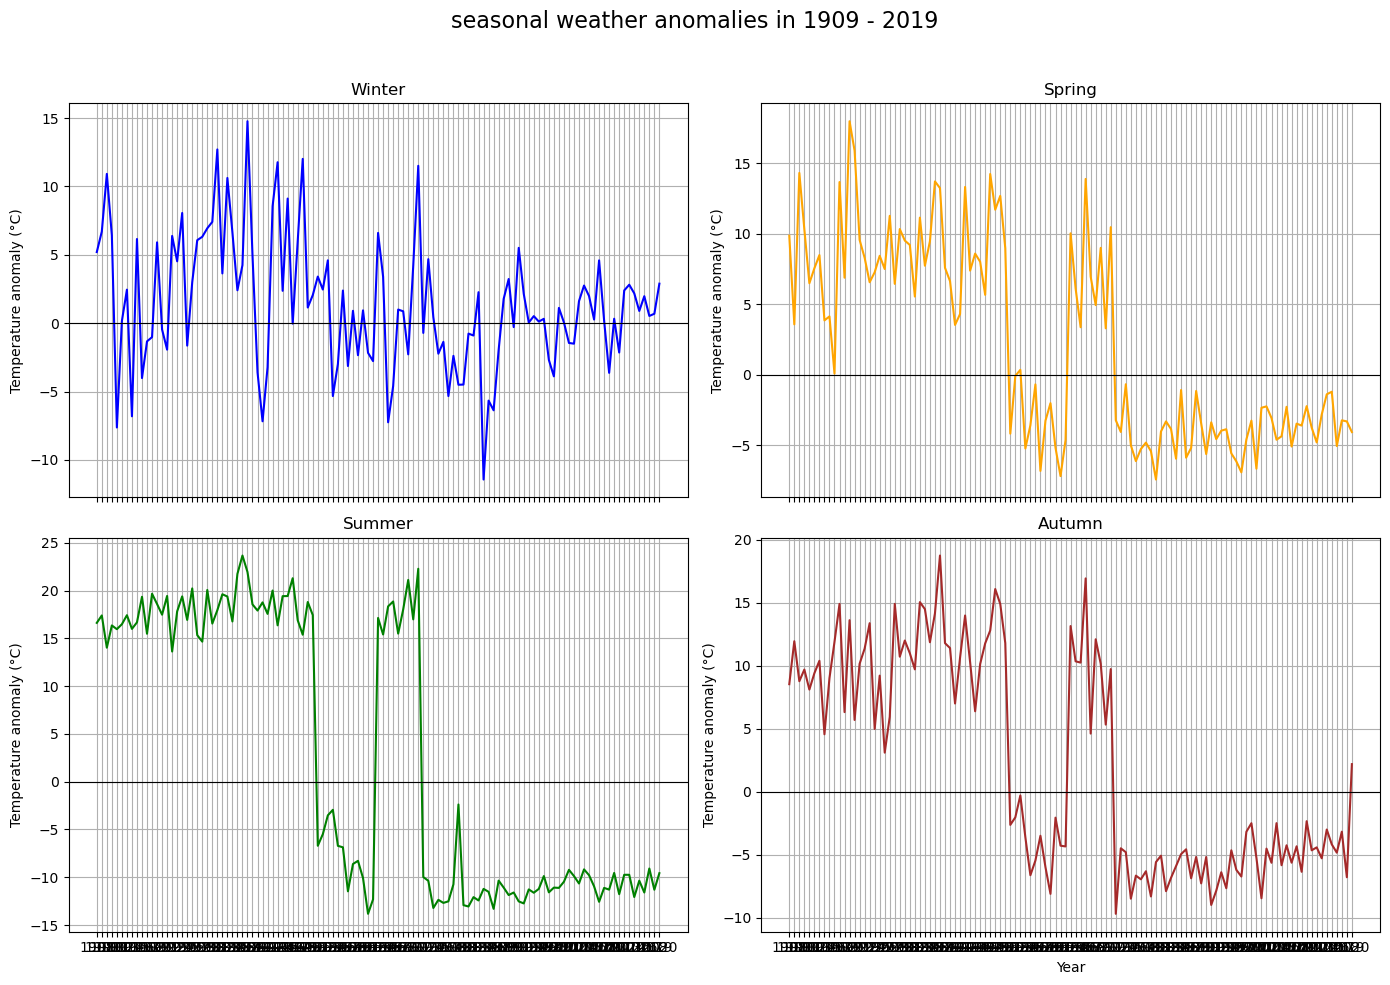

In [117]:
#plot the data
fig, axes = plt.subplots(2, 2, figsize = (14, 10), sharex = True)
fig.suptitle("seasonal weather anomalies in 1909 - 2019", fontsize = 16)
seasons = ["Winter", "Spring", "Summer", "Autumn"]
positions = [(0, 0),(0, 1), (1, 0), (1, 1)]
season_colours = {
    "Winter": "blue",
    "Spring": "orange",
    "Summer": "green",
    "Autumn": "brown"
}

for season, pos in zip(seasons, positions):
    ax = axes[pos]
    ax.plot(seasonal_anomaly.index, seasonal_anomaly[season], label = season, color=season_colours[season])
    ax.axhline(0, color = "black", linewidth = 0.8)
    ax.set_title(season)
    ax.set_ylabel("Temperature anomaly (°C)")
    ax.grid(True)
    
    
plt.xlabel("Year")
plt.tight_layout(rect=[0, 0, 1, 0.96])

#save plot as image
outputfp = None
outputfp = "seasonal_weather_anomalies.png"
plt.savefig(outputfp)

plt.show()


<Figure size 640x480 with 0 Axes>